In [1]:
%load_ext lab_black
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

np.random.seed(42)

# Generate data from truth

In [2]:
truth = lambda x: 1e-3 * x + 1

n = 1000
x = np.arange(n)
y = truth(x) + (x + 200) / n * (np.random.random(n) - 0.5)

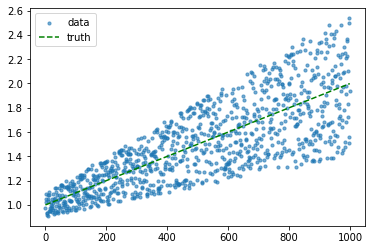

In [3]:
plt.scatter(x, y, alpha=0.6, s=10, label="data")
plt.plot(x, truth(x), c="g", ls="--", label="truth")
plt.legend()

# Simple RSS fit

[Wikipedia](https://en.wikipedia.org/wiki/Residual_sum_of_squares)

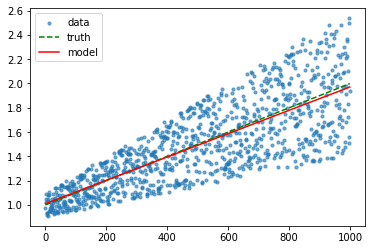

In [4]:
def model(x, a, b):
    return a * x + b


def residual(params, x, y):
    a, b = params
    diff = y - model(x, a, b)
    return np.sum(diff**2)  # RSS


res = scipy.optimize.minimize(residual, x0=(0, 0), args=(x, y))

plt.scatter(x, y, alpha=0.6, s=10, label="data")
plt.plot(x, truth(x), c="g", ls="--", label="truth")
plt.plot(x, model(x, *res.x), c="r", label="model")
plt.legend()

# Quantile Regression

following [sklearn.linear_model.QuantileRegressor](https://scikit-learn.org/stable/modules/linear_model.html#quantile-regression)

90.0% quantile


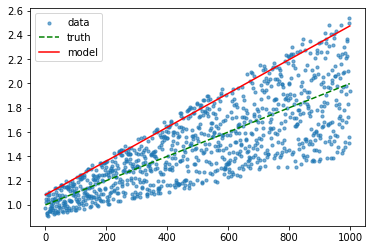

In [5]:
def model(x, a, b):
    return a * x + b


def residual(w, x, y, q, α):
    def PB(q, t):
        res = q * np.maximum(t, 0) + (1 - q) * np.maximum(-t, 0)
        return res

    a, b = w
    res = 1 / len(x) * np.sum(PB(q, y - model(x, a, b))) + α * np.sum(np.abs(w))
    return res


q = 0.9
res = scipy.optimize.minimize(residual, x0=(1e-3, 1), args=(x, y, q, 1e-10))

plt.scatter(x, y, alpha=0.6, s=10, label="data")
plt.plot(x, truth(x), c="g", ls="--", label="truth")
plt.plot(x, model(x, *res.x), c="r", label="model")
plt.legend()

print(f"{np.sum(model(x, *res.x) > y) / len(x) * 100:.1f}% quantile")